In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
X = boston_df
y = pd.DataFrame(boston.target, columns=["Price"])

In [3]:
pd.concat([X, y], axis = 1).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.2)

In [5]:
print(f"The total number of examples is : {X.shape[0]}")
print(f"The number of examples in the training set is : {X_train.shape[0]}")
print(f"The number of examples in the test set is : {X_test.shape[0]}")

The total number of examples is : 506
The number of examples in the training set is : 404
The number of examples in the test set is : 102


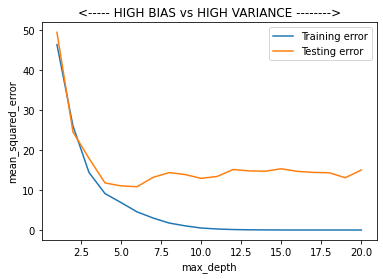

In [6]:
x_plot = []
y_train_plot = []
y_test_plot = []
for max_depth in range(1, 20 + 1):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(X_train, y_train)
    y_test_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    x_plot.append(max_depth)
    y_test_plot.append(mse_test)
    y_train_plot.append(mse_train)

plt.plot(x_plot, y_train_plot, label = "Training error")
plt.plot(x_plot, y_test_plot, label = "Testing error")
plt.xlabel("max_depth")
plt.ylabel("mean_squared_error")
plt.title("<----- HIGH BIAS vs HIGH VARIANCE -------->")
plt.rcParams['figure.figsize'] = [20, 15]
plt.legend()
plt.show()

In [7]:
decision_tree_regressor = DecisionTreeRegressor(random_state=3)
decision_tree_regressor.fit(X_train, y_train)
y_pred_test = decision_tree_regressor.predict(X_test)
y_pred_train = decision_tree_regressor.predict(X_train)
print(f"The accuracy for the test set is {mean_squared_error(y_test, y_pred_test)}")
print(f"The accuracy for the train set is {mean_squared_error(y_train, y_pred_train)}")

The accuracy for the test set is 14.563137254901958
The accuracy for the train set is 0.0


In [7]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=3)
random_forest_regressor.fit(X_train, y_train)
y_pred_test = random_forest_regressor.predict(X_test)
y_pred_train = random_forest_regressor.predict(X_train)
print(f"The accuracy for the test set is {mean_squared_error(y_test, y_pred_test)}")
print(f"The accuracy for the train set is {mean_squared_error(y_train, y_pred_train)}")

The accuracy for the test set is 7.522607627450986
The accuracy for the train set is 1.4009550693069297


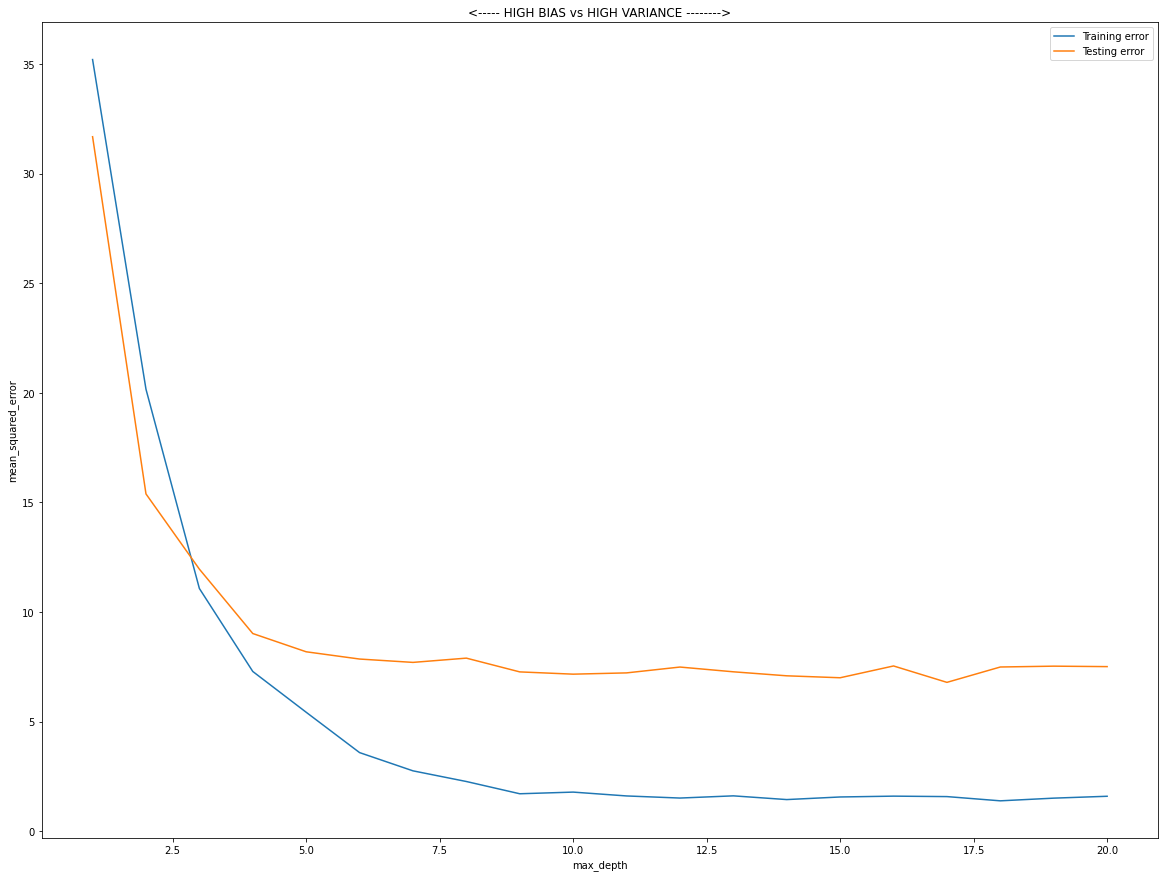

In [8]:
x_plot = []
y_train_plot = []
y_test_plot = []
for max_depth in range(1, 20 + 1):
    regressor = RandomForestRegressor(max_depth=max_depth)
    regressor.fit(X_train, y_train)
    y_test_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    x_plot.append(max_depth)
    y_test_plot.append(mse_test)
    y_train_plot.append(mse_train)

plt.plot(x_plot, y_train_plot, label = "Training error")
plt.plot(x_plot, y_test_plot, label = "Testing error")
plt.xlabel("max_depth")
plt.ylabel("mean_squared_error")
plt.title("<----- HIGH BIAS vs HIGH VARIANCE -------->")
plt.rcParams['figure.figsize'] = [20, 15]
plt.legend()
plt.show()